In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [34]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df_train = pd.read_csv('data/train_limpio.csv', dtype={'id':'int', 'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'},index_col='id')

In [35]:
lista_numericas = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','precio']

antiguedad


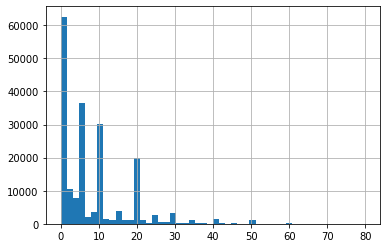

habitaciones


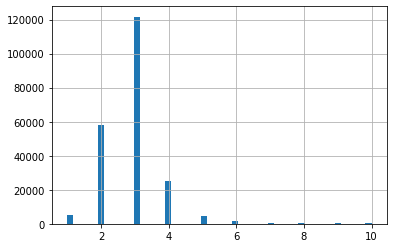

garages


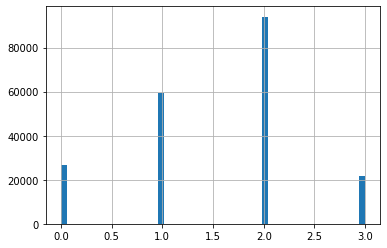

banos


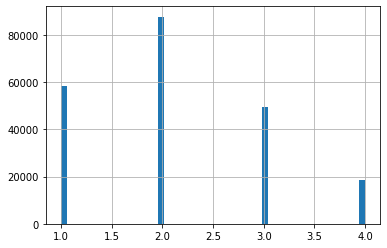

metroscubiertos


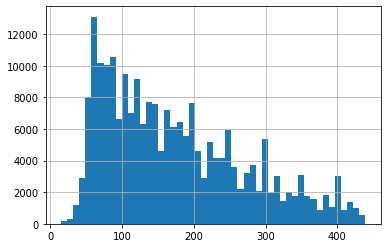

metrostotales


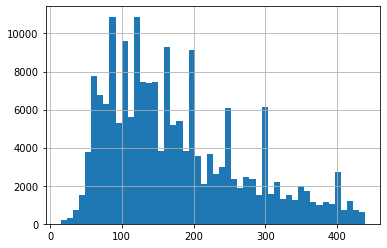

precio


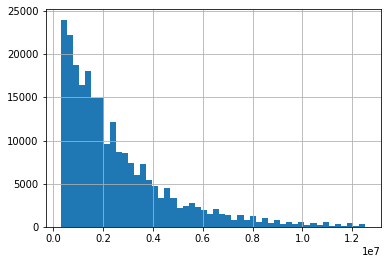

In [36]:
for numerica in lista_numericas:
    df_train[numerica].hist(bins=50)
    print(numerica)
    plt.show()

In [37]:
#Voy a transformar el precio, para que tenga una transformacion normal
#dado que que esta "skewed" a la izquierda.
#Tambien se puede utilizar la transformacion de Box Cox
#https://blog.minitab.com/blog/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation
#df_train['precio'] = np.log1p(df_train['precio'])

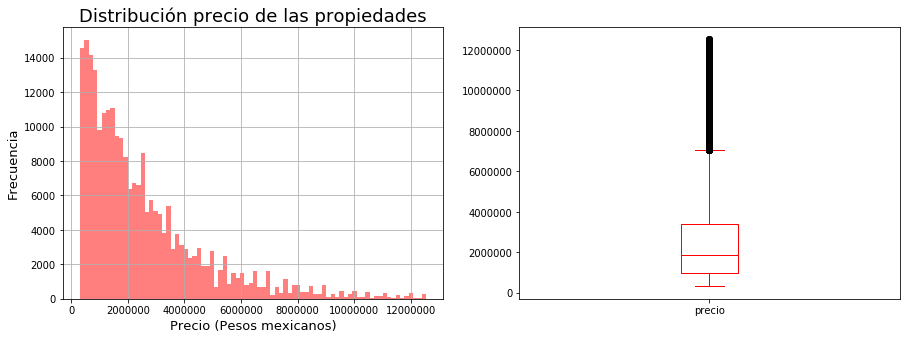

In [38]:
#Distribucion precios de las casas
_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].ticklabel_format(style = 'plain')
axes[1].ticklabel_format(style = 'plain')

g = df_train['precio'].hist(bins=80,alpha=0.5,ax=axes[0],color='red')
g.set_title("Distribución precio de las propiedades", fontsize=18)
g.set_ylabel("Frecuencia", fontsize=13)
g.set_xlabel("Precio (Pesos mexicanos)", fontsize=13)
df_train['precio'].plot(kind='box', ax=axes[1],color='red');
plt.savefig('graficos/dist_precio_hist_box', bbox_inches = 'tight')

In [39]:
df_train['precio'] = np.log1p(df_train['precio'])

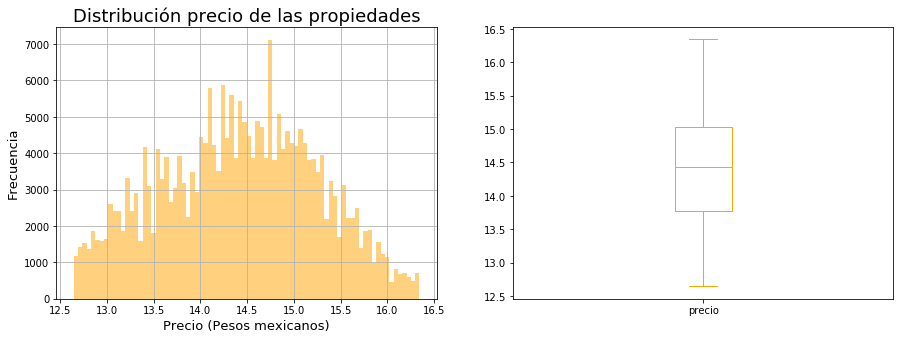

In [40]:
#Distribucion precios de las casas
_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].ticklabel_format(style = 'plain')
axes[1].ticklabel_format(style = 'plain')

g = df_train['precio'].hist(bins=80,alpha=0.5,ax=axes[0],color='orange')
g.set_title("Distribución precio de las propiedades", fontsize=18)
g.set_ylabel("Frecuencia", fontsize=13)
g.set_xlabel("Precio (Pesos mexicanos)", fontsize=13)
df_train['precio'].plot(kind='box', ax=axes[1],color='orange');
plt.savefig('graficos/dist_precio_log_hist_box', bbox_inches = 'tight')

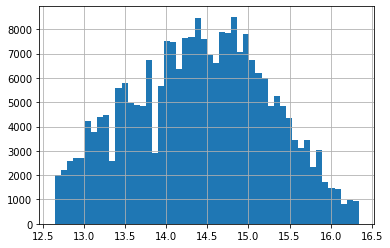

In [41]:
df_train['precio'].hist(bins=50)

In [7]:
df_train.head()

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,año,mes,dia
id,,,,,,,,,,,,,,,,,,,
254099,Apartamento,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,False,False,False,False,False,14.636612,2015,8,23
53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,False,False,False,True,True,15.096445,2013,6,28
247984,Casa,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,False,False,False,False,False,13.997833,2015,10,17
209067,Casa,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,False,False,False,True,True,13.384729,2012,3,9
185997,Apartamento,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,False,False,False,False,False,13.955273,2016,6,7
